In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from scipy.stats import zscore
%matplotlib inline

In [2]:
recipe=pd.read_csv('recipe.csv')

In [3]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,['2'],['tablespoon'],['walnuts']
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,['3'],['Numbers'],['spring onions']
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,['1'],['tablespoon'],['white wine vinegar']
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,['1'],['handful'],['lettuce loose-leaf']
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,['1/4'],['teaspoon'],['garam masala powder']


In [4]:
recipe.isnull().sum()

Recipe_name          0
Author               0
Date_published       0
Category             0
Cuisine           3313
Prep_time            0
Cook_time            0
Serving              0
Yield                0
Nutrition            0
Quantity             0
Unit                 0
Ingredient           0
dtype: int64

In [5]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36735 entries, 0 to 36734
Data columns (total 13 columns):
Recipe_name       36735 non-null object
Author            36735 non-null object
Date_published    36735 non-null object
Category          36735 non-null object
Cuisine           33422 non-null object
Prep_time         36735 non-null object
Cook_time         36735 non-null object
Serving           36735 non-null object
Yield             36735 non-null object
Nutrition         36735 non-null object
Quantity          36735 non-null object
Unit              36735 non-null object
Ingredient        36735 non-null object
dtypes: object(13)
memory usage: 3.6+ MB


In [6]:
recipe.columns

Index(['Recipe_name', 'Author', 'Date_published', 'Category', 'Cuisine',
       'Prep_time', 'Cook_time', 'Serving', 'Yield', 'Nutrition', 'Quantity',
       'Unit', 'Ingredient'],
      dtype='object')

In [7]:
recipe['Quantity']=recipe['Quantity'].str.replace('[','')

In [8]:
recipe['Quantity']=recipe['Quantity'].str.replace(']','')

In [9]:
recipe['Quantity']=recipe['Quantity'].str.replace("'",'')

In [10]:
recipe['Unit']=recipe['Unit'].str.replace(']','')
recipe['Unit']=recipe['Unit'].str.replace("'",'')
recipe['Unit']=recipe['Unit'].str.replace('[','')

In [11]:
recipe['Ingredient']=recipe['Ingredient'].str.replace(']','')
recipe['Ingredient']=recipe['Ingredient'].str.replace("'",'')
recipe['Ingredient']=recipe['Ingredient'].str.replace('[','')

In [12]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,2,tablespoon,walnuts
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,3,Numbers,spring onions
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,1,tablespoon,white wine vinegar
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,1,handful,lettuce loose-leaf
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,1/4,teaspoon,garam masala powder


In [13]:
recipe['Quantity']=recipe['Quantity'].str.split(' ')

In [14]:
len(recipe['Quantity'][6])

2

In [15]:
float(1/4)

0.25

In [16]:
def to_convert_float(frac_str):
    tot_frac=frac_str
    if'/' in frac_str:
        if ' ' in frac_str:
            x=frac_str.split(' ')
            y=x[1].split('/')
            frac=int(y[0])/int(y[1])
            tot_frac=int(x[0])+frac
            tot_frac=int(y[0])+frac
        else:
            x=frac_str.split('/')
            tot_frac=int(x[0])/int(x[1])
    return(tot_frac)


In [17]:
print(to_convert_float('56'))

56


In [18]:
x=[]
for i in recipe['Quantity']:
    x.append(to_convert_float(i))
print(x)

[['2'], ['3'], ['1'], ['1'], ['1/4'], ['2'], ['1', '1/2'], ['1/2'], ['1/2'], ['1'], ['1'], ['2'], ['2'], ['3'], ['1'], ['10'], ['2'], ['1/2'], ['1'], ['1'], ['2'], ['1/2'], ['1'], ['1/2'], ['2'], ['1/2'], ['1/2'], ['1/2'], ['2'], ['1'], ['1/4'], ['1/2'], ['1/2'], ['1'], ['2'], ['1'], ['1'], ['2'], ['200'], ['150'], ['100'], ['1'], ['1'], ['1'], ['2'], ['2'], ['4'], ['4'], ['10'], ['1'], ['1'], ['3'], ['2', '1/3'], ['2'], ['3'], ['0'], ['500'], ['4'], ['2'], ['1'], ['2'], ['2'], ['2'], ['2'], ['1/4'], ['1'], ['2'], ['20'], ['4'], ['1'], ['1'], ['2'], ['4'], ['20'], ['2'], ['20'], ['4'], ['1'], ['1'], ['2'], ['4'], ['20'], ['2'], ['1'], ['1/2'], ['1/2'], ['1'], ['1', '1/2'], ['1', '1/2'], ['3', '1/2'], ['1/2'], ['2'], ['1'], ['1'], ['1'], ['2'], ['3'], ['1'], ['1'], ['1'], ['2'], ['1'], ['2'], ['1'], ['1/2'], ['2'], ['2'], ['1/2'], ['1'], ['1'], ['1/4'], ['200'], ['1'], ['2'], ['2'], ['1'], ['1/4'], ['1'], ['1'], ['1'], ['1/4'], ['1'], ['1/4'], ['200'], ['1'], ['1'], ['1'], ['1'], ['2'],

In [19]:
recipe['quantity']=x

In [20]:
recipe.drop('Quantity',axis=1)

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Unit,Ingredient,quantity
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,tablespoon,walnuts,[2]
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,Numbers,spring onions,[3]
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,tablespoon,white wine vinegar,[1]
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,handful,lettuce loose-leaf,[1]
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,teaspoon,garam masala powder,[1/4]
5,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,pinch,salt,[2]
6,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,cup,strawberry,"[1, 1/2]"
7,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,cup,mayonnaise,[1/2]
8,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,cup,onion,[1/2]
9,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,4 Servings,1 bowl,352 cal,cup,chicken breasts,[1]


In [21]:
recipe['Serving']

0         4 Servings
1         4 Servings
2         4 Servings
3         4 Servings
4         4 Servings
5         4 Servings
6         4 Servings
7         4 Servings
8         4 Servings
9         4 Servings
10        4 Servings
11       10 Servings
12       10 Servings
13       10 Servings
14       10 Servings
15       10 Servings
16       10 Servings
17       10 Servings
18       10 Servings
19       10 Servings
20       10 Servings
21       10 Servings
22       10 Servings
23        4 Servings
24        4 Servings
25        4 Servings
26        4 Servings
27        4 Servings
28        4 Servings
29        4 Servings
            ...     
36705     6 Servings
36706     6 Servings
36707     6 Servings
36708     6 Servings
36709     6 Servings
36710     6 Servings
36711     6 Servings
36712     6 Servings
36713     6 Servings
36714     6 Servings
36715     6 Servings
36716     6 Servings
36717     6 Servings
36718     6 Servings
36719    11 Servings
36720    11 Servings
36721    11 S

In [22]:
recipe['Serving']=recipe['Serving'].str.split()

In [23]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient,quantity
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,"[4, Servings]",1 bowl,352 cal,[2],tablespoon,walnuts,[2]
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,"[4, Servings]",1 bowl,352 cal,[3],Numbers,spring onions,[3]
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,"[4, Servings]",1 bowl,352 cal,[1],tablespoon,white wine vinegar,[1]
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,"[4, Servings]",1 bowl,352 cal,[1],handful,lettuce loose-leaf,[1]
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,PT10M,PT20M,"[4, Servings]",1 bowl,352 cal,[1/4],teaspoon,garam masala powder,[1/4]


In [24]:
recipe['Serving']=recipe['Serving']

In [25]:
recipe['Serving'][0]=[4,'Servings']

In [26]:
recipe['Serving']

0         [4, Servings]
1         [4, Servings]
2         [4, Servings]
3         [4, Servings]
4         [4, Servings]
5         [4, Servings]
6         [4, Servings]
7         [4, Servings]
8         [4, Servings]
9         [4, Servings]
10        [4, Servings]
11       [10, Servings]
12       [10, Servings]
13       [10, Servings]
14       [10, Servings]
15       [10, Servings]
16       [10, Servings]
17       [10, Servings]
18       [10, Servings]
19       [10, Servings]
20       [10, Servings]
21       [10, Servings]
22       [10, Servings]
23        [4, Servings]
24        [4, Servings]
25        [4, Servings]
26        [4, Servings]
27        [4, Servings]
28        [4, Servings]
29        [4, Servings]
              ...      
36705     [6, Servings]
36706     [6, Servings]
36707     [6, Servings]
36708     [6, Servings]
36709     [6, Servings]
36710     [6, Servings]
36711     [6, Servings]
36712     [6, Servings]
36713     [6, Servings]
36714     [6, Servings]
36715     [6, Se

In [27]:
re=pd.read_csv('recipe.csv')

In [28]:
recipe['Serving']=re['Serving']

In [29]:
recipe['Serving'].replace(regex=True,inplace=True,to_replace=r'Servings',value=r'')


In [30]:
recipe['Serving']

0         4 
1         4 
2         4 
3         4 
4         4 
5         4 
6         4 
7         4 
8         4 
9         4 
10        4 
11       10 
12       10 
13       10 
14       10 
15       10 
16       10 
17       10 
18       10 
19       10 
20       10 
21       10 
22       10 
23        4 
24        4 
25        4 
26        4 
27        4 
28        4 
29        4 
        ... 
36705     6 
36706     6 
36707     6 
36708     6 
36709     6 
36710     6 
36711     6 
36712     6 
36713     6 
36714     6 
36715     6 
36716     6 
36717     6 
36718     6 
36719    11 
36720    11 
36721    11 
36722    11 
36723    11 
36724    11 
36725    11 
36726    11 
36727    11 
36728    11 
36729     4 
36730     4 
36731     4 
36732     4 
36733     4 
36734     4 
Name: Serving, Length: 36735, dtype: object

In [31]:
recipe['Yield'].replace(regex=True,inplace=True,to_replace=r'bowl',value=r'')


In [32]:
recipe['Nutrition'].replace(regex=True,inplace=True,to_replace=r'cal',value=r'')


In [33]:
recipe['Prep_time'] = recipe['Prep_time'].map(lambda x: x.lstrip('PT').rstrip('M'))

In [34]:
recipe['Prep_time']

0        10
1        10
2        10
3        10
4        10
5        10
6        10
7        10
8        10
9        10
10       10
11       15
12       15
13       15
14       15
15       15
16       15
17       15
18       15
19       15
20       15
21       15
22       15
23       50
24       50
25       50
26       50
27       50
28       50
29       50
         ..
36705    10
36706    10
36707    10
36708    10
36709    10
36710    10
36711    10
36712    10
36713    10
36714    10
36715    10
36716    10
36717    10
36718    10
36719    10
36720    10
36721    10
36722    10
36723    10
36724    10
36725    10
36726    10
36727    10
36728    10
36729     5
36730     5
36731     5
36732     5
36733     5
36734     5
Name: Prep_time, Length: 36735, dtype: object

In [35]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient,quantity
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,PT20M,4,1,352,[2],tablespoon,walnuts,[2]
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,PT20M,4,1,352,[3],Numbers,spring onions,[3]
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,PT20M,4,1,352,[1],tablespoon,white wine vinegar,[1]
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,PT20M,4,1,352,[1],handful,lettuce loose-leaf,[1]
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,PT20M,4,1,352,[1/4],teaspoon,garam masala powder,[1/4]


In [36]:
recipe['Cook_time'] = recipe['Cook_time'].map(lambda x: x.lstrip('PT').rstrip('M'))

In [37]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient,quantity
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,20,4,1,352,[2],tablespoon,walnuts,[2]
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,20,4,1,352,[3],Numbers,spring onions,[3]
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,20,4,1,352,[1],tablespoon,white wine vinegar,[1]
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,20,4,1,352,[1],handful,lettuce loose-leaf,[1]
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28T16:00:47+05:30,Salads,Continental,10,20,4,1,352,[1/4],teaspoon,garam masala powder,[1/4]


In [38]:
recipe['Date_published']=pd.to_datetime(recipe['Date_published'])

In [39]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient,quantity
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,1,352,[2],tablespoon,walnuts,[2]
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,1,352,[3],Numbers,spring onions,[3]
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,1,352,[1],tablespoon,white wine vinegar,[1]
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,1,352,[1],handful,lettuce loose-leaf,[1]
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,1,352,[1/4],teaspoon,garam masala powder,[1/4]


In [40]:
recipe['Prep_time'].replace(to_replace='',value='0',inplace=True)

In [41]:
recipe['Cook_time'].replace(to_replace=0,value='0',inplace=True)

In [42]:
#recipe['Cook_time']=pd.to_numeric(recipe['Cook_time'])

In [43]:
recipe['Prep_time'].map(lambda x: x.rstrip('-'))

0        10
1        10
2        10
3        10
4        10
5        10
6        10
7        10
8        10
9        10
10       10
11       15
12       15
13       15
14       15
15       15
16       15
17       15
18       15
19       15
20       15
21       15
22       15
23       50
24       50
25       50
26       50
27       50
28       50
29       50
         ..
36705    10
36706    10
36707    10
36708    10
36709    10
36710    10
36711    10
36712    10
36713    10
36714    10
36715    10
36716    10
36717    10
36718    10
36719    10
36720    10
36721    10
36722    10
36723    10
36724    10
36725    10
36726    10
36727    10
36728    10
36729     5
36730     5
36731     5
36732     5
36733     5
36734     5
Name: Prep_time, Length: 36735, dtype: object

In [44]:
recipe['Prep_time'].map(lambda x: x.rstrip('-'))

0        10
1        10
2        10
3        10
4        10
5        10
6        10
7        10
8        10
9        10
10       10
11       15
12       15
13       15
14       15
15       15
16       15
17       15
18       15
19       15
20       15
21       15
22       15
23       50
24       50
25       50
26       50
27       50
28       50
29       50
         ..
36705    10
36706    10
36707    10
36708    10
36709    10
36710    10
36711    10
36712    10
36713    10
36714    10
36715    10
36716    10
36717    10
36718    10
36719    10
36720    10
36721    10
36722    10
36723    10
36724    10
36725    10
36726    10
36727    10
36728    10
36729     5
36730     5
36731     5
36732     5
36733     5
36734     5
Name: Prep_time, Length: 36735, dtype: object

In [45]:
recipe['Prep_time'].replace(to_replace='10-',value='10',inplace=True)

In [46]:
recipe['Prep_time']=pd.to_numeric(recipe['Prep_time'])

In [47]:
recipe['Nutrition'].replace(to_replace=' ',value='0',inplace=True)

In [48]:
recipe['Nutrition']=pd.to_numeric(recipe['Nutrition'])

In [49]:
recipe['Yield']=pd.to_numeric(recipe['Nutrition'])

In [50]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36735 entries, 0 to 36734
Data columns (total 14 columns):
Recipe_name       36735 non-null object
Author            36735 non-null object
Date_published    36735 non-null datetime64[ns]
Category          36735 non-null object
Cuisine           33422 non-null object
Prep_time         36735 non-null int64
Cook_time         36735 non-null object
Serving           36735 non-null object
Yield             36735 non-null int64
Nutrition         36735 non-null int64
Quantity          36735 non-null object
Unit              36735 non-null object
Ingredient        36735 non-null object
quantity          36735 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 3.9+ MB


In [51]:
recipe

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient,quantity
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[2],tablespoon,walnuts,[2]
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[3],Numbers,spring onions,[3]
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1],tablespoon,white wine vinegar,[1]
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1],handful,lettuce loose-leaf,[1]
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1/4],teaspoon,garam masala powder,[1/4]
5,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[2],pinch,salt,[2]
6,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,"[1, 1/2]",cup,strawberry,"[1, 1/2]"
7,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1/2],cup,mayonnaise,[1/2]
8,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1/2],cup,onion,[1/2]
9,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1],cup,chicken breasts,[1]


In [52]:
recipe['Nutrition'].replace(to_replace='NaN',value='0',inplace=True)

In [53]:
recipe.drop(columns='quantity',axis=0,inplace=True)

In [54]:
recipe.head()

,Recipe_name,Author,Date_published,Category,Cuisine,Prep_time,Cook_time,Serving,Yield,Nutrition,Quantity,Unit,Ingredient
0,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[2],tablespoon,walnuts
1,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[3],Numbers,spring onions
2,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1],tablespoon,white wine vinegar
3,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1],handful,lettuce loose-leaf
4,Chicken and Strawberry Salad Recipe,TNN,2016-08-28 10:30:47,Salads,Continental,10,20,4,352,352,[1/4],teaspoon,garam masala powder


In [55]:
recipe['Quantity']=recipe['Quantity'].str.replace('[','')

In [56]:
r=pd.read_csv('recipe.csv')

In [57]:
recipe['Quantity']=r['Quantity']

In [58]:
recipe['Quantity']=recipe['Quantity'].str.replace('[','')
recipe['Quantity']=recipe['Quantity'].str.replace(']','')

In [59]:
recipe['Quantity']=recipe['Quantity'].str.replace("'",'')

In [60]:
recipe['Quantity']

0            2
1            3
2            1
3            1
4          1/4
5            2
6        1 1/2
7          1/2
8          1/2
9            1
10           1
11           2
12           2
13           3
14           1
15          10
16           2
17         1/2
18           1
19           1
20           2
21         1/2
22           1
23         1/2
24           2
25         1/2
26         1/2
27         1/2
28           2
29           1
         ...  
36705        1
36706        3
36707        1
36708        3
36709      1/4
36710        1
36711    1 1/2
36712      1/4
36713        4
36714      1/4
36715      100
36716        1
36717        4
36718        2
36719        3
36720        2
36721      1/2
36722        4
36723        2
36724        2
36725        2
36726        8
36727        4
36728        1
36729        0
36730      1/4
36731        1
36732        4
36733        4
36734        4
Name: Quantity, Length: 36735, dtype: object

In [61]:
a=[]
b=[]
for i in recipe.Quantity:
    if ('/') in i:
        if (' ') in i:
            n=i.split(' ')
            num,deno=n[1].split('/')
            n1=n[0]
            s=(float(num)/float(deno))+float(n1)
            a.append(round(s,2))
        else:
            num,deno=i.split('/')
            s=float(num)/float(deno)
            a.append(round(s,2))
    else:
        if(i.isdigit()):
            a.append(float(i))
        else:
            a.append(1)

In [62]:
a

[2.0,
 3.0,
 1.0,
 1.0,
 0.25,
 2.0,
 1.5,
 0.5,
 0.5,
 1.0,
 1.0,
 2.0,
 2.0,
 3.0,
 1.0,
 10.0,
 2.0,
 0.5,
 1.0,
 1.0,
 2.0,
 0.5,
 1.0,
 0.5,
 2.0,
 0.5,
 0.5,
 0.5,
 2.0,
 1.0,
 0.25,
 0.5,
 0.5,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 200.0,
 150.0,
 100.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 4.0,
 4.0,
 10.0,
 1.0,
 1.0,
 3.0,
 2.33,
 2.0,
 3.0,
 0.0,
 500.0,
 4.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 0.25,
 1.0,
 2.0,
 20.0,
 4.0,
 1.0,
 1.0,
 2.0,
 4.0,
 20.0,
 2.0,
 20.0,
 4.0,
 1.0,
 1.0,
 2.0,
 4.0,
 20.0,
 2.0,
 1.0,
 0.5,
 0.5,
 1.0,
 1.5,
 1.5,
 3.5,
 0.5,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0.5,
 2.0,
 2.0,
 0.5,
 1.0,
 1.0,
 0.25,
 200.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.25,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 0.25,
 200.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 1.0,
 2.0,
 1.0,
 0.5,
 2.0,
 2.0,
 0.5,
 1.0,
 1.0,
 0.25,
 200.0,
 1.0,
 2.0,
 2.0,
 1.0,
 0.25,
 1.0,
 1.0,
 1.0,
 0.25,
 1.0,
 0.25,
 200.0,
 1.0,
 100.0,
 500.0,
 1.0,
 2.5,
 30.0,
 2.0,
 20.0,


In [63]:
recipe['Quantity']=a

In [64]:
recipe['Quantity']

0          2.00
1          3.00
2          1.00
3          1.00
4          0.25
5          2.00
6          1.50
7          0.50
8          0.50
9          1.00
10         1.00
11         2.00
12         2.00
13         3.00
14         1.00
15        10.00
16         2.00
17         0.50
18         1.00
19         1.00
20         2.00
21         0.50
22         1.00
23         0.50
24         2.00
25         0.50
26         0.50
27         0.50
28         2.00
29         1.00
          ...  
36705      1.00
36706      3.00
36707      1.00
36708      3.00
36709      0.25
36710      1.00
36711      1.50
36712      0.25
36713      4.00
36714      0.25
36715    100.00
36716      1.00
36717      4.00
36718      2.00
36719      3.00
36720      2.00
36721      0.50
36722      4.00
36723      2.00
36724      2.00
36725      2.00
36726      8.00
36727      4.00
36728      1.00
36729      0.00
36730      0.25
36731      1.00
36732      4.00
36733      4.00
36734      4.00
Name: Quantity, Length: 

In [65]:
pp.ProfileReport(recipe)

Number of variables,13
Number of observations,36735
Total Missing (%),0.7%
Total size in memory,3.6 MiB
Average record size in memory,104.0 B
Numeric,3
Categorical,7
Boolean,0
Date,1
Text (Unique),0
Rejected,2


In [66]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36735 entries, 0 to 36734
Data columns (total 13 columns):
Recipe_name       36735 non-null object
Author            36735 non-null object
Date_published    36735 non-null datetime64[ns]
Category          36735 non-null object
Cuisine           33422 non-null object
Prep_time         36735 non-null int64
Cook_time         36735 non-null object
Serving           36735 non-null object
Yield             36735 non-null int64
Nutrition         36735 non-null int64
Quantity          36735 non-null float64
Unit              36735 non-null object
Ingredient        36735 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 3.6+ MB


In [67]:
recipe['Cuisine'].fillna(value=recipe['Cuisine'].mode(),inplace=True)

# EDA 

In [68]:
corr=recipe.corr()

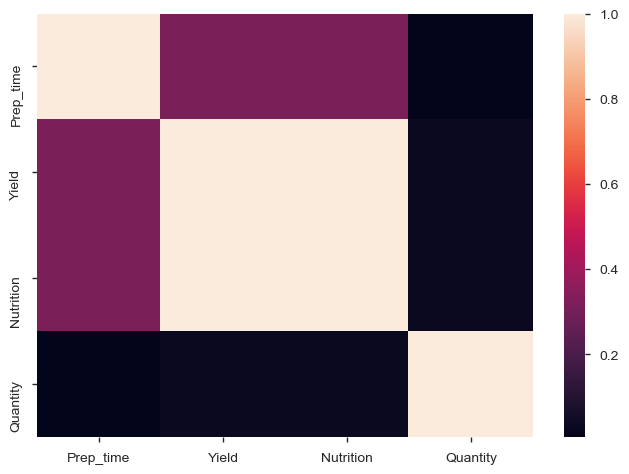

In [69]:
sns.heatmap(corr)

In [70]:
recipe.columns

Index(['Recipe_name', 'Author', 'Date_published', 'Category', 'Cuisine',
       'Prep_time', 'Cook_time', 'Serving', 'Yield', 'Nutrition', 'Quantity',
       'Unit', 'Ingredient'],
      dtype='object')

In [71]:
recipe.drop(columns=['Recipe_name','Author','Yield','Date_published'],axis=0,inplace=True)

In [72]:
recipe.head()

,Category,Cuisine,Prep_time,Cook_time,Serving,Nutrition,Quantity,Unit,Ingredient
0,Salads,Continental,10,20,4,352,2.00,tablespoon,walnuts
1,Salads,Continental,10,20,4,352,3.00,Numbers,spring onions
2,Salads,Continental,10,20,4,352,1.00,tablespoon,white wine vinegar
3,Salads,Continental,10,20,4,352,1.00,handful,lettuce loose-leaf
4,Salads,Continental,10,20,4,352,0.25,teaspoon,garam masala powder


In [73]:
new_recipe=recipe.drop(columns='Category',axis=0)

In [74]:
dummy_recipe=pd.get_dummies(new_recipe)

# Random Forest Classifier

In [76]:
X= dummy_recipe
y=recipe.Category

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3 ,random_state=100)

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [79]:
m1=rf.fit(X_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [80]:
pred=m1.predict(X_test)

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy_score(y_test,pred)

0.8926594682878142

# Decision Tree Classifier

In [83]:
dtree = DecisionTreeClassifier()

In [84]:
pred2 = dtree.fit(X_train,y_train).predict(X_test)

In [85]:
accuracy_score(y_test, pred2)

0.9918337718900281

In [99]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(pred2, y_test))

[[3604    4    0    0    7    1    0    5    0    0    6    7    0]
 [   3  736    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0  203    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0   74    0    0    0    0    0    0    0    0    0]
 [  11    0    0    0  864    0    0    3    0    0    2    4    0]
 [   1    0    0    0    1  836    0    0    0    0    1    3    0]
 [   0    0    0    0    0    0   51    0    0    0    0    0    0]
 [   8    0    0    0    1    0    0 2088    0    0    0    0    0]
 [   1    4    0    0    0    0    0    0  182    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0   42    0    0    0]
 [   1    0    0    0    2    4    0    1    0    0  589    0    0]
 [   5    0    0    0    1    0    0    2    1    0    0 1659    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    3]]


# KNN

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [87]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [88]:
pred3 = knn.predict(X_test)

In [89]:
accuracy_score(y_test, pred3)

0.9166137374103983

# Bagging

In [90]:
from sklearn.ensemble import BaggingClassifier

DT_bag = BaggingClassifier(base_estimator= dtree, n_estimators=50, max_samples=1.0)


In [91]:
DT_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=None, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [92]:
pred4 = DT_bag.predict(X_test)

In [93]:
accuracy_score(y_test, pred4)

0.9902005262680338